# Поиск отличий классов вырубка/не-вырубка с использованием базовых слоев

Параметры подключения к БД GRASS:

In [1]:
source('grasslib.R')

In [2]:
library(rgrass7)

Loading required package: sp
Loading required package: XML
GRASS GIS interface loaded with GRASS version: (GRASS not running)


## Исходные данные

Подключимся к БД GRASS и прочитаем растры в переменную для дальнейшего анализа:

In [3]:
initGRASS(gisBase = get_gisbase_path(), home = tempdir(), 
          gisDbase = get_grassdata_path(),
          location = get_location_name(), mapset = "basemap_test")

gisdbase    //home/klsvd/GRASSDATA 
location    FOREST 
mapset      basemap_test 
rows        4400 
columns     3967 
north       5374515 
south       4978485 
west        350985 
east        708015 
nsres       90.00682 
ewres       90 
projection  +proj=utm +no_defs +zone=53 +a=6378137 +rf=298.257223563
+towgs84=0.000,0.000,0.000 +to_meter=1 

Список растров, с которыми будем работать (сами растры сгенерированы в [блокноте](050_ML_basemaps.ipynb)). Это данные разностей между медианами зимних снимков за зиму 15-16 и 14-15 годов:

In [4]:
maps = execGRASS('g.list', parameters = list(type = "rast", pattern = "diff1615*", mapset="basemaps"), flags = "m")

diff1615.1@basemaps
diff1615.10@basemaps
diff1615.11@basemaps
diff1615.2@basemaps
diff1615.3@basemaps
diff1615.4@basemaps
diff1615.5@basemaps
diff1615.6@basemaps
diff1615.7@basemaps
diff1615.8@basemaps
diff1615.9@basemaps


In [5]:
attributes(maps)
maps = attributes(maps)$resOut

$resOut
 [1] "diff1615.1@basemaps"  "diff1615.10@basemaps" "diff1615.11@basemaps"
 [4] "diff1615.2@basemaps"  "diff1615.3@basemaps"  "diff1615.4@basemaps" 
 [7] "diff1615.5@basemaps"  "diff1615.6@basemaps"  "diff1615.7@basemaps" 
[10] "diff1615.8@basemaps"  "diff1615.9@basemaps" 

$resErr
character(0)

In [6]:
names = c(maps, c("tr1516.alrm@basemaps"))
names

[1] "diff1615.1@basemaps"  "diff1615.10@basemaps" "diff1615.11@basemaps"
 [4] "diff1615.2@basemaps"  "diff1615.3@basemaps"  "diff1615.4@basemaps" 
 [7] "diff1615.5@basemaps"  "diff1615.6@basemaps"  "diff1615.7@basemaps" 
[10] "diff1615.8@basemaps"  "diff1615.9@basemaps"  "tr1516.alrm@basemaps"

Уменьшим разрешение области для снижения количества обрабатываемых данных:

In [7]:
execGRASS("g.region", parameters = list(raster = 'tr1516.alrm@basemaps', res="90"), flags='p')

projection: 1 (UTM)
zone:       53
datum:      wgs84
ellipsoid:  wgs84
north:      5374515
south:      4978485
west:       350985
east:       708015
nsres:      90.00681818
ewres:      90
rows:       4400
cols:       3967
cells:      17454800


Читаем данные:

In [8]:
predictor_count = length(maps)
all_data <- readRAST(names, cat=c(rep(FALSE, predictor_count), TRUE), ignore.stderr = TRUE)

Creating BIL support files...
Exporting raster as floating values (bytes=4)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Creating BIL support files...
Exporting raster as floating values (bytes=4)
   0%   3%   6%   9%  12%  15%  18%  21%  24%  27%  30%  33%  36%  39%  42%  45%  48%  51%  54%  57%  60%  63%  66%  69%  72%  75%  78%  81%  84%  87%  90%  93%  96%  99% 100%
Creating BIL support files...
Exporting raster as floating values (bytes=4)
   0%   3%   6%   9%  12%  15%  18%

Warning message in .read_rast_non_plugin(vname = vname, NODATA = NODATA, driverFileExt = driverFileExt, :
“non-unique category labels; category number appended”

In [9]:
str(all_data)

Formal class 'SpatialGridDataFrame' [package "sp"] with 4 slots
  ..@ data       :'data.frame':	17454800 obs. of  12 variables:
  .. ..$ diff1615.1.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.10.basemaps: num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.11.basemaps: num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.2.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.3.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.4.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.5.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.6.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.7.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.8.basemaps : num [1:17454800] NA NA NA NA NA NA NA NA NA NA ...
  .. ..$ diff1615.9.basemaps : num [1:17454800] NA N

In [10]:
str(all_data@data)

'data.frame':	17454800 obs. of  12 variables:
 $ diff1615.1.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.10.basemaps: num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.11.basemaps: num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.2.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.3.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.4.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.5.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.6.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.7.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.8.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ diff1615.9.basemaps : num  NA NA NA NA NA NA NA NA NA NA ...
 $ tr1516.alrm.basemaps: Factor w/ 2 levels "_0","_1": 1 1 1 1 1 1 1 1 1 1 ...


Изображение в восьмом канале:

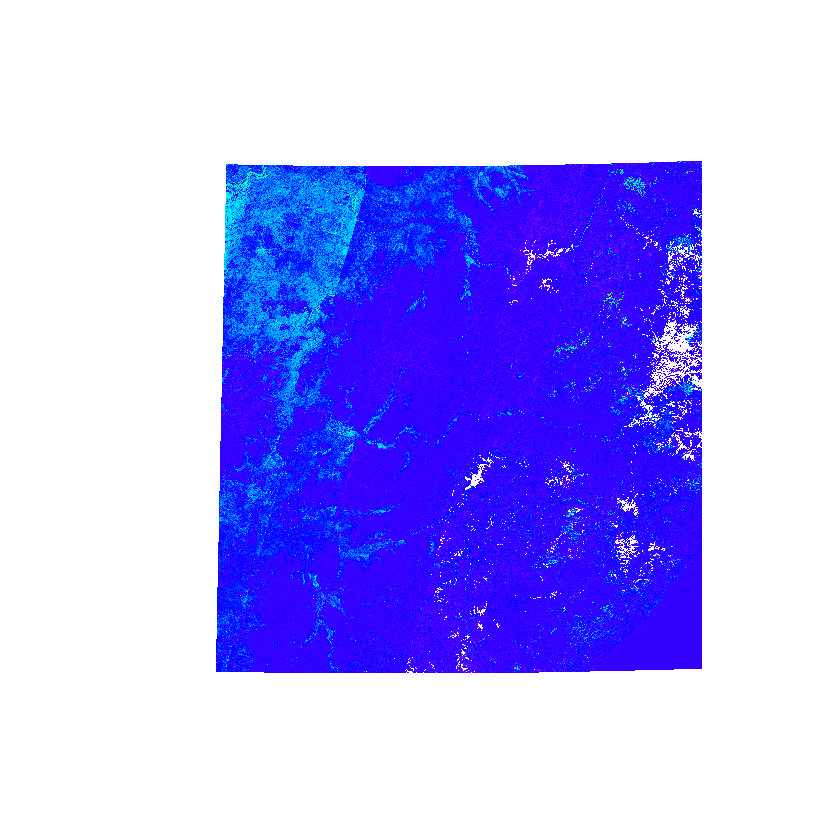

In [11]:
image(all_data, "diff1615.5.basemaps", col = rainbow(40))

## Описательные статистики

Как видим, на один пиксель рубок (рубки закодированы единицами) приходится почти полторы тысячи не-рубок (закодированы нулями):

In [12]:
table(all_data$tr1516.alrm.basemaps)


      _0       _1 
17441845    12955 

Т.е. рубка очень редкое событие, нужно это учитвывать при построении моделей.

### Ящики с усами

Посмотрим, различаются ли средние и разброс в зависимости от типа объекта (рубка/не-рубка). Для этого по каждому каналу построим ящики с усами.

#### Первый канал

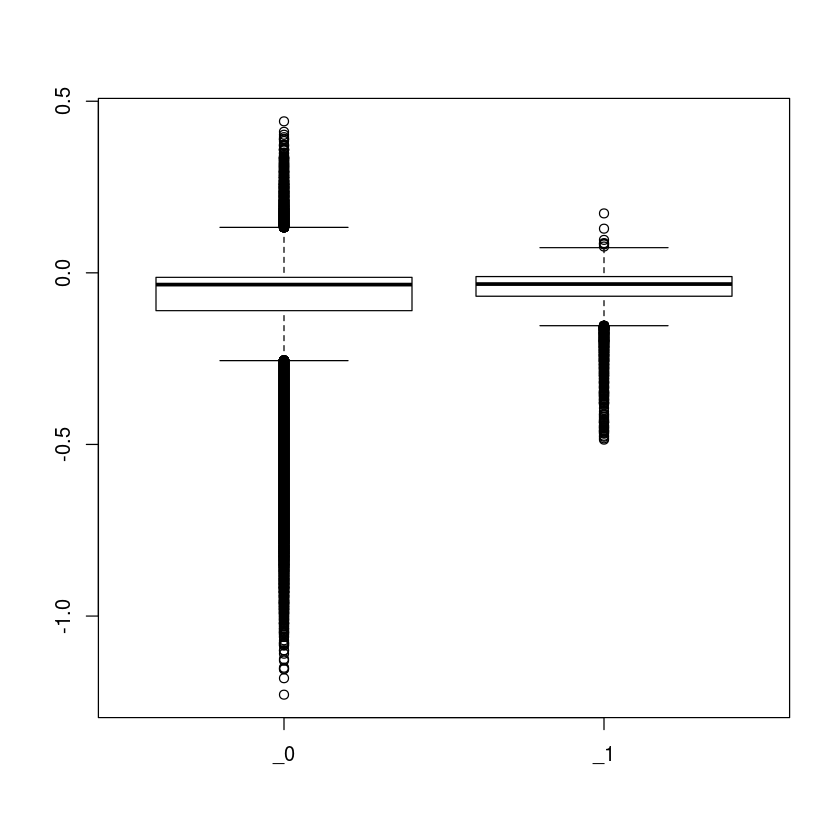

In [13]:
boxplot(all_data$diff1615.1.basemaps ~ all_data$tr1516.alrm.basemaps)

В первом канале медианы приблизительно равны (для рубок медиана очень незначительно выше), но для рубок разброс больше, чем для не-рубок. Правда, этот разброс может быть обусловлен тем, что точек с рубками в тысячу раз меньше, чем не-рубок. В дальнейшем нужно будет проверить, может ли полученное различие быть объяснено перекосом в примерах.

**Замечание.** Ящики показывают очень сильный сдвиг значений в отрицательную область: медиана не-рубок ниже нуля. С учетом того, что мы анализируем разности *усредненных значений (точнее медиан зимних снимков)*, то это говорит о том, что зимой 15-16 годов снимки фиксировали в среднем более высокие значения отражательной способности, чем чем зимой 14-15 годов. А это в свою очередь говорит о том, что данные из года в год "гуляют" довольно сильно и простое усреденение медианой снимков работает не очень хорошо. Как следствие, скорее всего нужно разбираться с нормированием снимков [см. блокнот](007_Normalization.ipynb).


Графики в разных каналах достаточно похожи между собой (за исключением тепловых), поэтому при прочтении можно сразу [перейти к выводам по ящикам](#BoxResume) или [общим выводам по блокноту](#Resume).

#### Второй канал

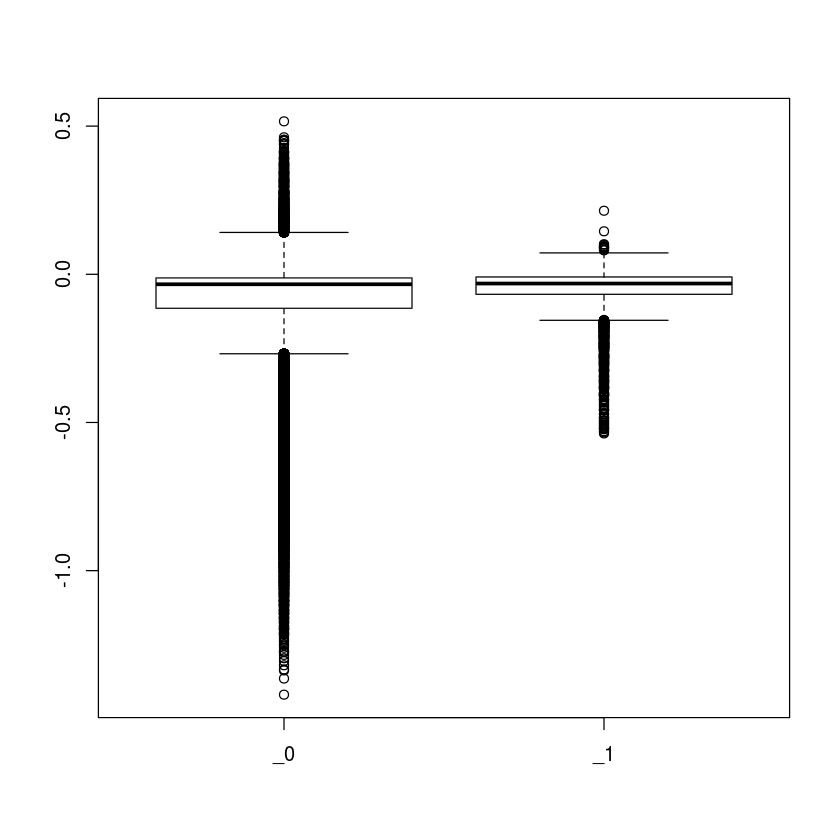

In [14]:
boxplot(all_data$diff1615.2.basemaps ~ all_data$tr1516.alrm.basemaps)

Ситуация во втором канале аналогична первому.

#### Третий канал

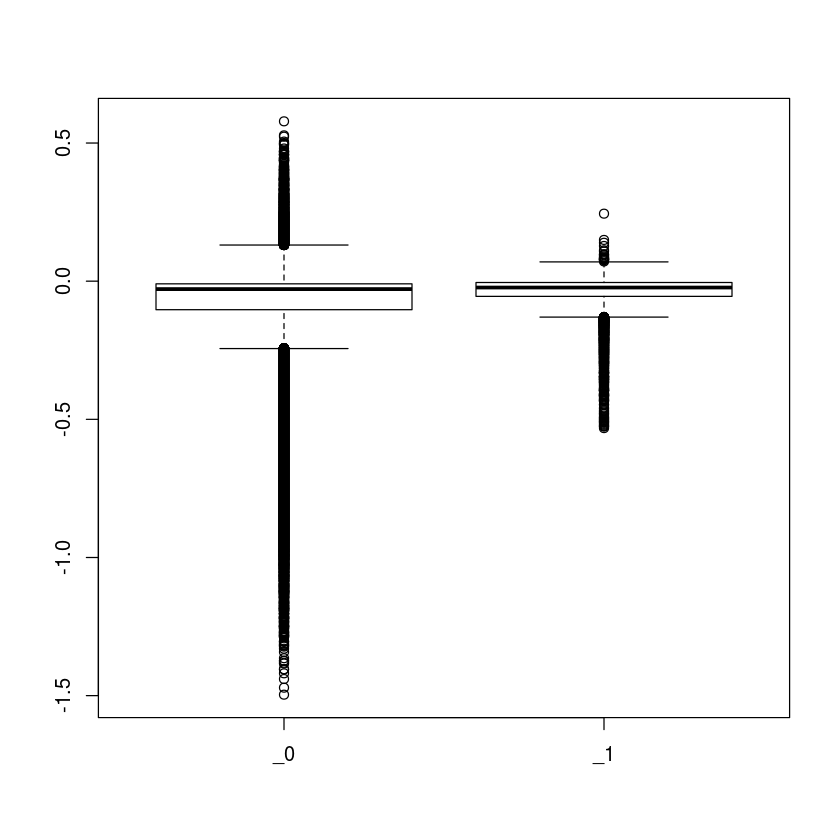

In [15]:
boxplot(all_data$diff1615.3.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично первому каналу.

#### Четвертый канал

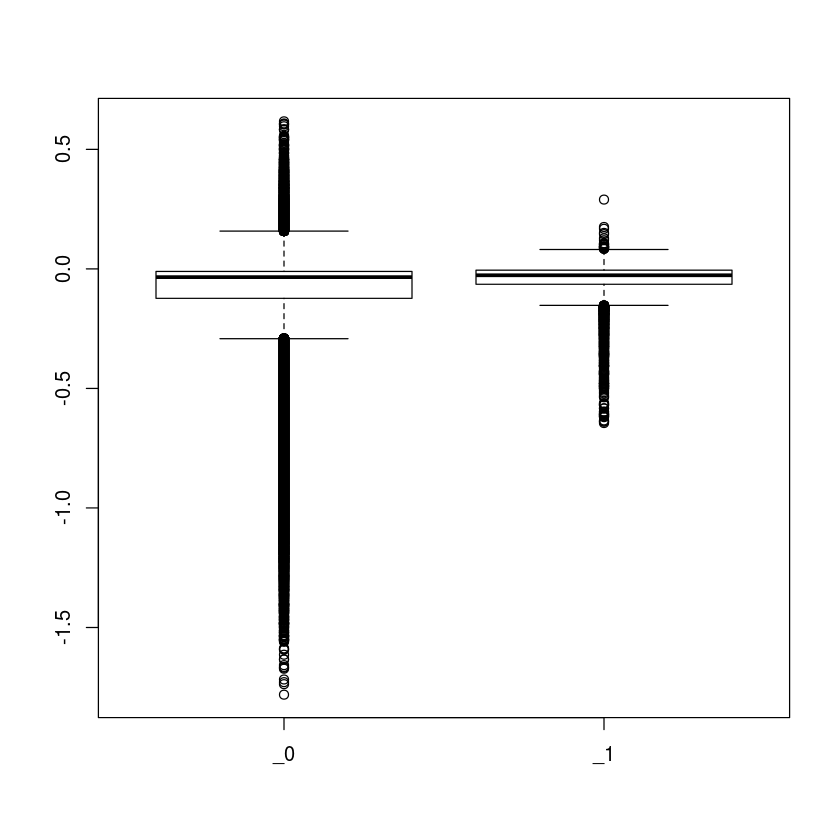

In [16]:
boxplot(all_data$diff1615.4.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично первому каналу.

#### Пятый канал

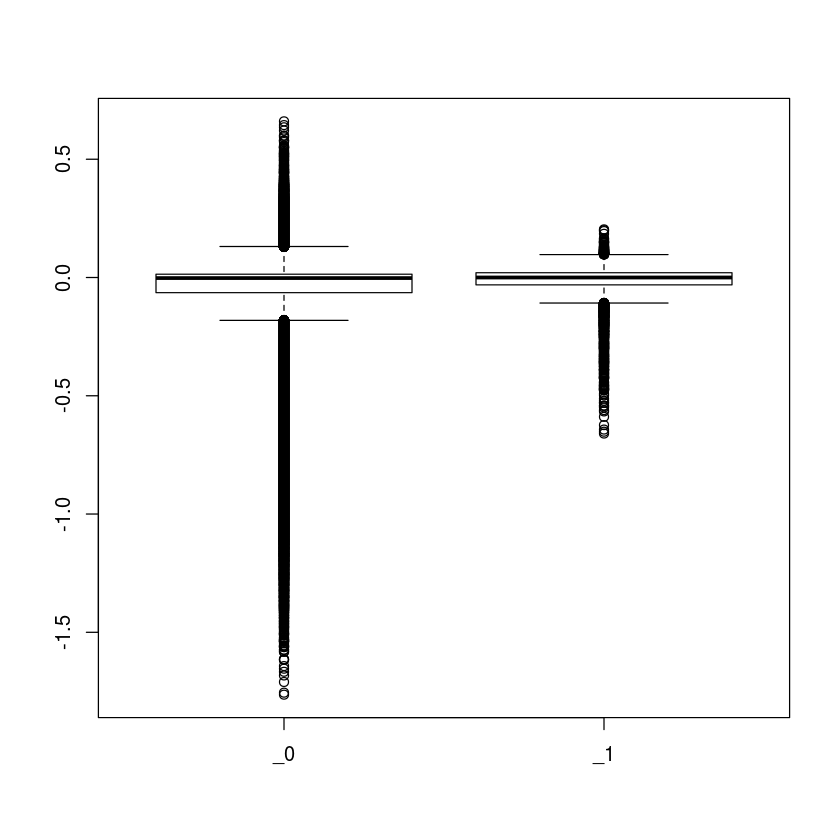

In [17]:
boxplot(all_data$diff1615.5.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично первому каналу.

#### Шестой канал

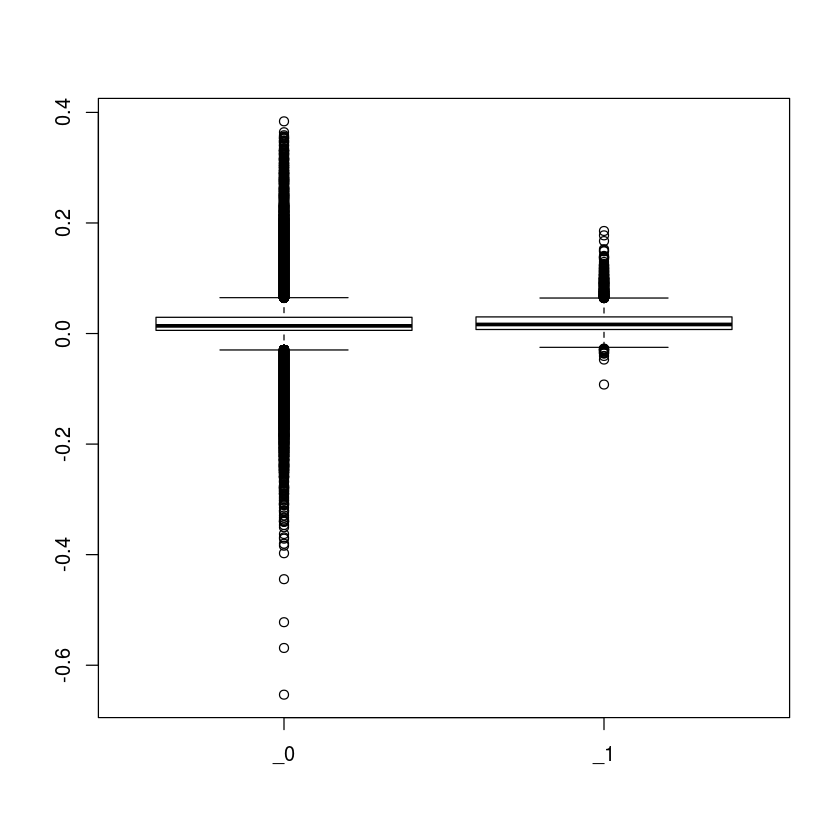

In [18]:
boxplot(all_data$diff1615.6.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично первому каналу, но разница в разбросе уже почти незаметна.

#### Седьмой канал

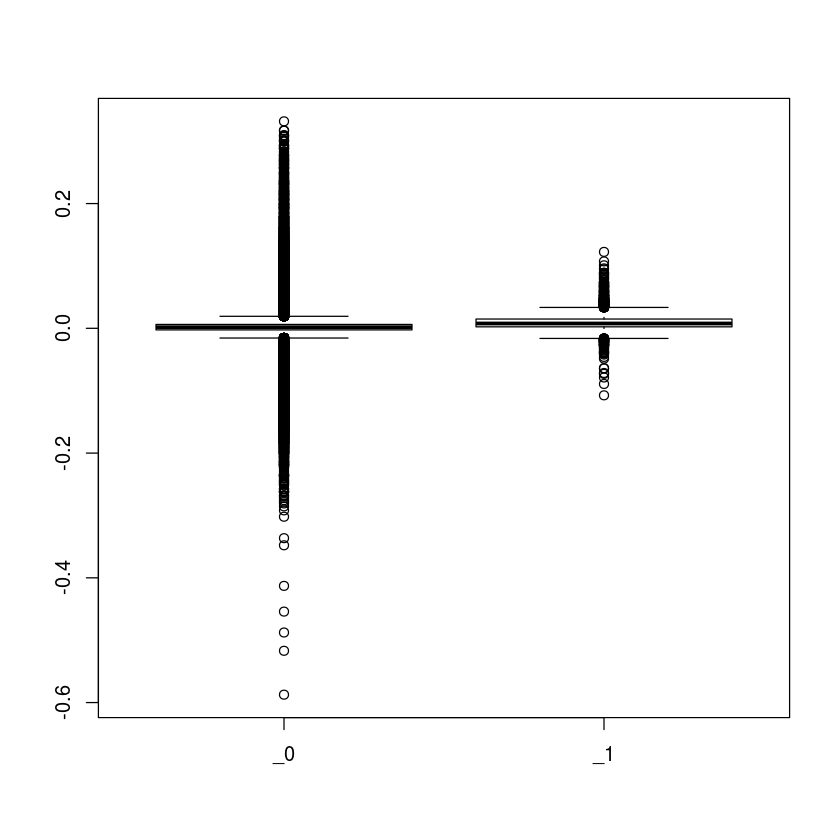

In [19]:
boxplot(all_data$diff1615.7.basemaps ~ all_data$tr1516.alrm.basemaps)

Кое-что интересное: разброс для рубок больше, чем для не-рубок, медиана визуально выше для рубок.

#### Восьмой канал

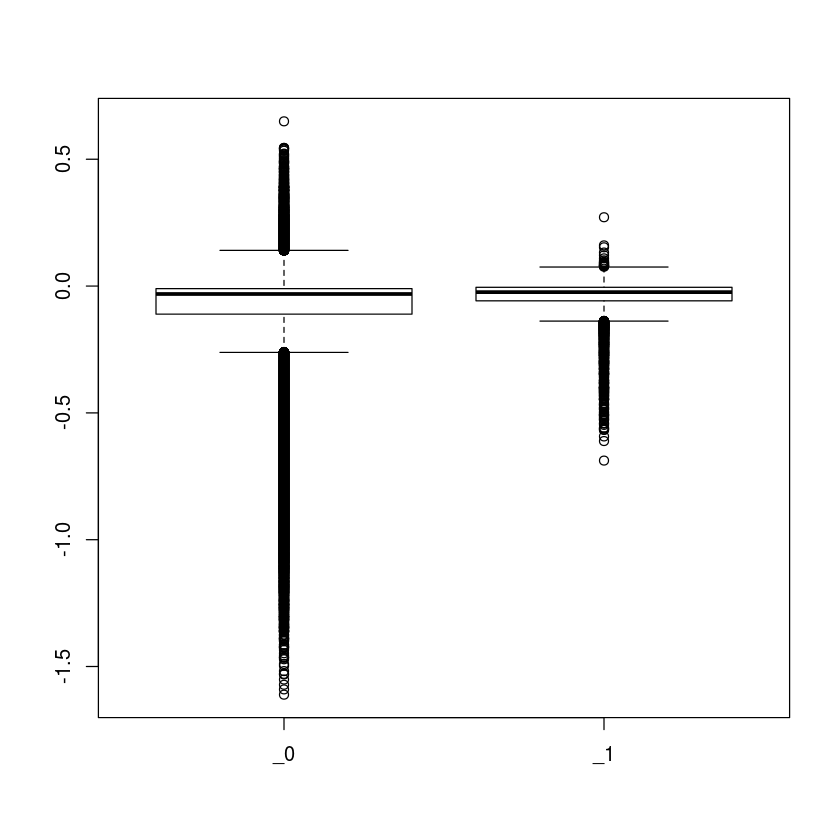

In [20]:
boxplot(all_data$diff1615.8.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично первому.

#### Девятый канал

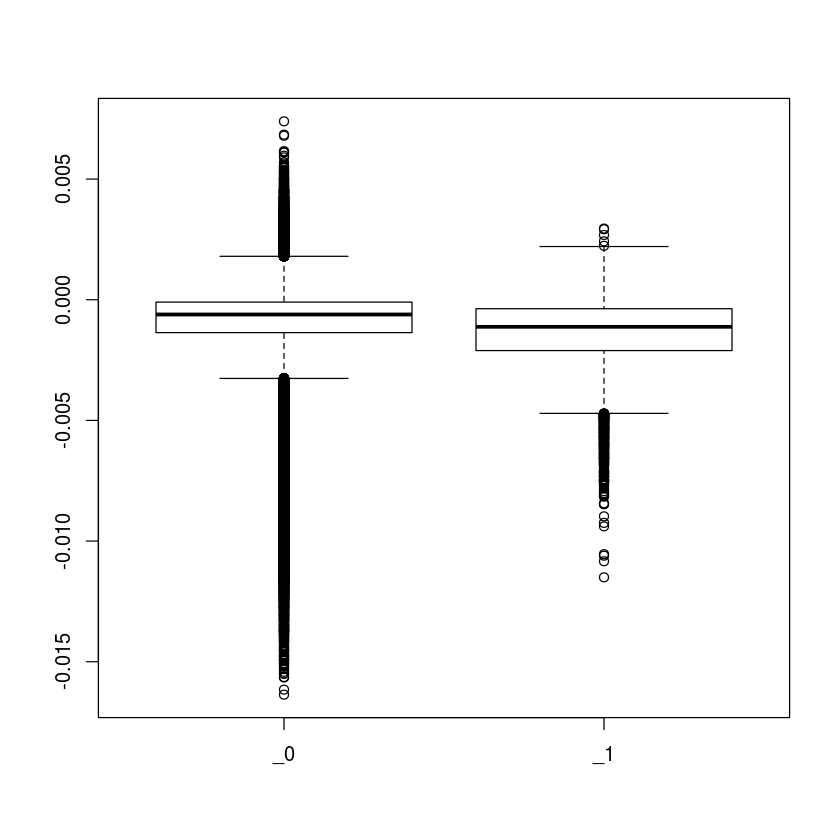

In [21]:
boxplot(all_data$diff1615.9.basemaps ~ all_data$tr1516.alrm.basemaps)

В девятом канале медиана для рубок ниже, чем для не-рубок, разброс для рубок выше, чем для не-рубок.

#### Десятый канал

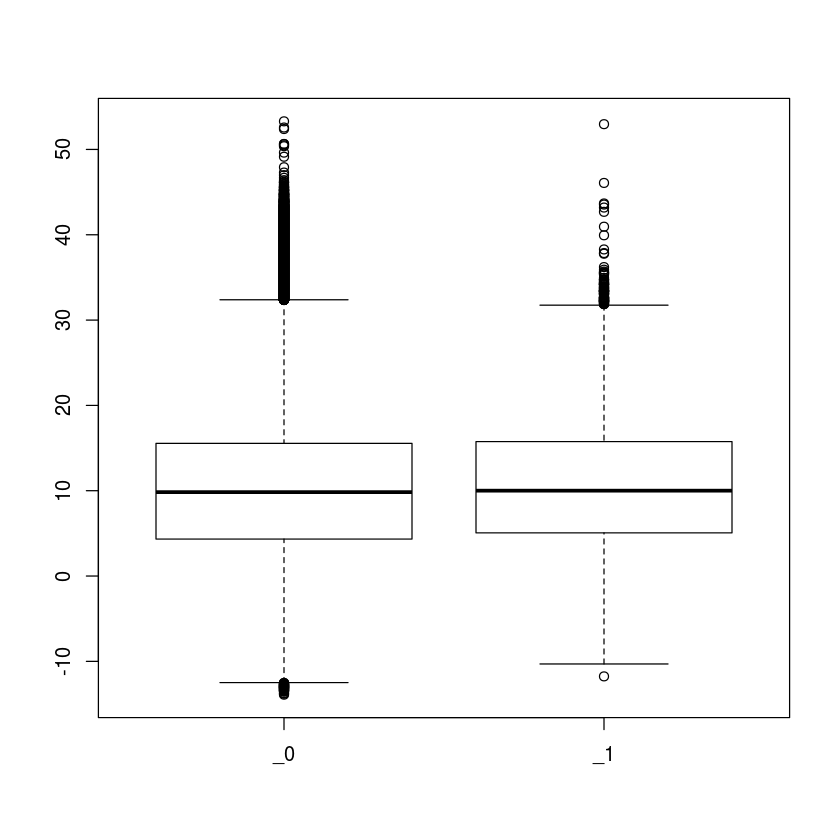

In [22]:
boxplot(all_data$diff1615.10.basemaps ~ all_data$tr1516.alrm.basemaps)

В десятом канале ящики почти одинаковые.

#### Одиннадцатый канал

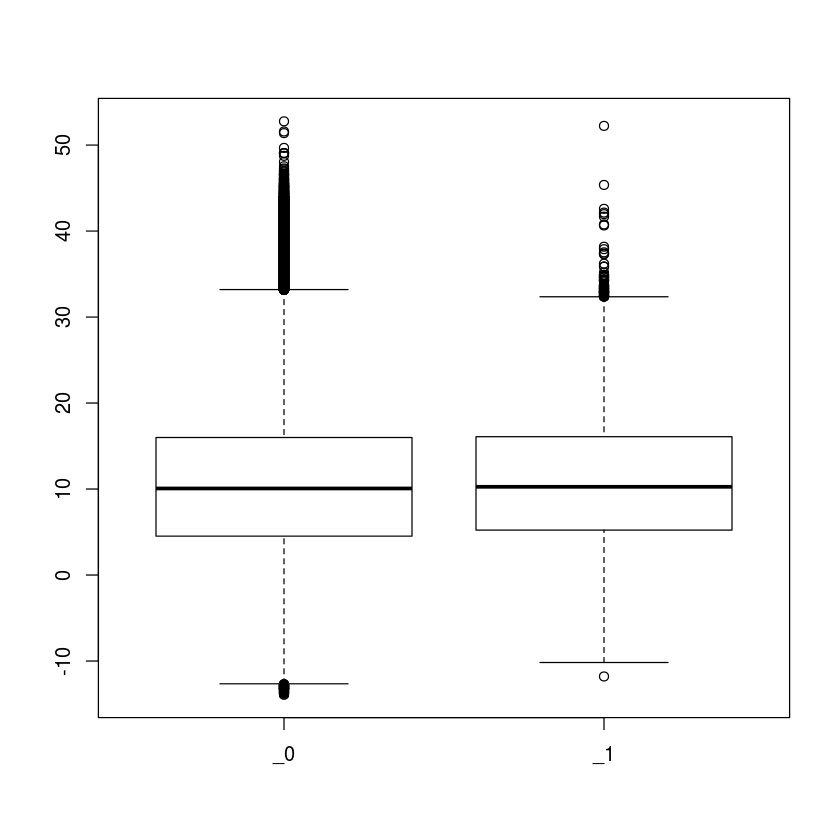

In [23]:
boxplot(all_data$diff1615.11.basemaps ~ all_data$tr1516.alrm.basemaps)

Аналогично десятому каналу.

<a id='BoxResume'></a>
#### Выводы по ящикам 

Как было сказано выше, ящики показывают очень сдвиг значений (в отрицательную область у первых каналов и в положительную у тепловых). Это говорит о том, что данные из года в год "гуляют" довольно сильно и простое усреденение медианой снимков работает не очень хорошо. Как следствие, скорее всего нужно разбираться с нормированием снимков.

1. Десятый и одиннадцатый каналы, скорее всего, можно не рассматривать: не очень похоже, что они дают много информации для разделения классов.
2. Нужно проверить, насколько значимо различие в разбросе для каналов с 1-го по 6-й, можно ли этот разброс считать закономерными или же он проявление случайных (неучтенных) факторов. Аналогично с медианами - насколько значимы отличия медиан в этих каналах.
3. Разность медиан в 7-м канале выглядит довольно приличной. Проверить значимость этого различия.
4. Для 9-го канала следует проверить значимость различия медиан и разброса.

## Статесты (поканально)

Итак, пробежим по каждому каналу и выдвинем гипотезу $H_0$ о том, что выборки рубки/не-рубки взяты из одного распределения, альтернативной гипотезой $H_1$ будет та, что выборки взяты из разных распределений. Для проверки будем использовать критерий Колмогорова-Смирнова.

### Первый канал

In [24]:
x = all_data$diff1615.1.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.1.basemaps[all_data$tr1516.alrm.basemaps == "_0"]

ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.14465, p-value < 2.2e-16
alternative hypothesis: two-sided


Вышло предупреждение. Согласно исходному коду, оно возникает, если в выборках x и/или y встречаются повторы. Типа данные берутся из непрерывного распределения и повторов быть не должно с вероятностью 1. Вопрос, насколько это влияет на результат в нашем случае? Разбираемся дальше. В документации написано:

Exact p-values are not available for the two-sample case if one-sided or in the presence of ties. If exact = NULL (the default), an exact p-value is computed if the sample size is less than 100 in the one-sample case and there are no ties, and if the product of the sample sizes is less than 10000 in the two-sample case. **Otherwise, asymptotic distributions are used whose approximations may be inaccurate in small samples.** In the one-sample two-sided case, exact p-values are obtained as described in Marsaglia, Tsang & Wang (2003) (but not using the optional approximation in the right tail, so this can be slow for small p-values). The formula of Birnbaum & Tingey (1951) is used for the one-sample one-sided case.

Судя по тому, что там сказано о выборках небольшого объема, то в нашем случае мы можем игнорировать предупреждение.

Таким образом, получили очень низкое p-value, что говорит о том, что мы можем с чистой совестью отбросить гипотезу $H_0$ о том, что выборки сделаны из одного распределения.

### Второй и последующий каналы

In [25]:
x = all_data$diff1615.2.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.2.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.14783, p-value < 2.2e-16
alternative hypothesis: two-sided


In [26]:
x = all_data$diff1615.3.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.3.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.15708, p-value < 2.2e-16
alternative hypothesis: two-sided


In [27]:
x = all_data$diff1615.4.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.4.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.15836, p-value < 2.2e-16
alternative hypothesis: two-sided


In [28]:
x = all_data$diff1615.5.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.5.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.11546, p-value < 2.2e-16
alternative hypothesis: two-sided


In [29]:
x = all_data$diff1615.6.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.6.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.068119, p-value < 2.2e-16
alternative hypothesis: two-sided


In [30]:
x = all_data$diff1615.7.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.7.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.32277, p-value < 2.2e-16
alternative hypothesis: two-sided


In [31]:
x = all_data$diff1615.8.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.8.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.15729, p-value < 2.2e-16
alternative hypothesis: two-sided


In [32]:
x = all_data$diff1615.9.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.9.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.18696, p-value < 2.2e-16
alternative hypothesis: two-sided


In [33]:
x = all_data$diff1615.10.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.10.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.047364, p-value < 2.2e-16
alternative hypothesis: two-sided


In [34]:
x = all_data$diff1615.11.basemaps[all_data$tr1516.alrm.basemaps == "_1"]
y = all_data$diff1615.11.basemaps[all_data$tr1516.alrm.basemaps == "_0"]
ks.test(x,y)

Warning message in ks.test(x, y):
“p-value will be approximate in the presence of ties”


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.0483, p-value < 2.2e-16
alternative hypothesis: two-sided


Итак, все тесты говорят, что выборки можно считать полученными из разных распределений.

<a id='Resume'></a>
## Общие выводы

Ящики с усами показывают, а статистические тесты подтверждают, что рубки и не-рубки различаются между собой. Однако, 
 * мы исследовали объекты рубок (которые приходятся на лесные зоны) и не-рубок (которые приходятся на все зоны, а не только лес); не исключено, что именно это различие выборок и было "поймано" на графиках; этому вопросу посвещается [отдельный блокнот](050_ML_exploration_basemaps.1.ipynb);
 * даже если выделенные различия реальны, нет гарантии, что они устойчивы (см. вопрос о систематическом смещения разности зимних медиан): почти во всех каналах разность между значениями одной зимы и второй отлична от нуля; нужно убедиться, что это смещение меньше, чем отличие, обусловленное типом объекта.